In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_time_data(file_path, column_name = 'elapsed time', label_column = None, label_value = None):
    from pathlib import Path
    file_path = Path(file_path)
    
    df_out = pd.DataFrame(columns=['number', 'tws size', column_name])

    with open(file_path, 'r') as file:
        for line in file.readlines():
            line_list = line.split()
            if line_list != []:
                if line_list[0] == 'tws':
                    line_temp = {'number' : [int(line_list[8])], 'tws size': [line_list[11]],  column_name:[line_list[2]] }
                    df_temp = pd.DataFrame(line_temp)
                    df_out = pd.concat([df_out, df_temp ])
    if label_column != None:
        df_out[label_column] = label_value
    
    df_out.set_index("number", inplace=True)

    return df_out

In [3]:
df_opt = get_time_data('../compared_perf/opt_04.txt',
                     #   "elapsed"
                       "Zig Optimized 4 TS"
                       )

print(df_opt.shape)
df_opt

(42, 2)


,tws size,Zig Optimized 4 TS
number,,
0,4,18
1,5,26
2,7,32
3,9,42
4,11,44
5,13,46
6,16,60
7,20,73
8,23,82


In [4]:
df_basic = get_time_data('../compared_perf/basic_04.txt',
                     #   "elapsed"
                       "Zig Basic 4 TS"
                       )

print(df_basic.shape)
df_basic

(42, 2)


,tws size,Zig Basic 4 TS
number,,
0,4,33
1,5,38
2,7,48
3,9,59
4,11,66
5,13,74
6,16,129
7,20,130
8,23,125


In [5]:

df_04 = pd.merge(df_basic,df_opt, on="tws size")
df_04


,tws size,Zig Basic 4 TS,Zig Optimized 4 TS
0,4,33,18
1,5,38,26
2,7,48,32
3,9,59,42
4,11,66,44
5,13,74,46
6,16,129,60
7,20,130,73
8,23,125,82
9,28,155,83


C:\Users\Nando\AppData\Local\Temp\ipykernel_8060\1245724163.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


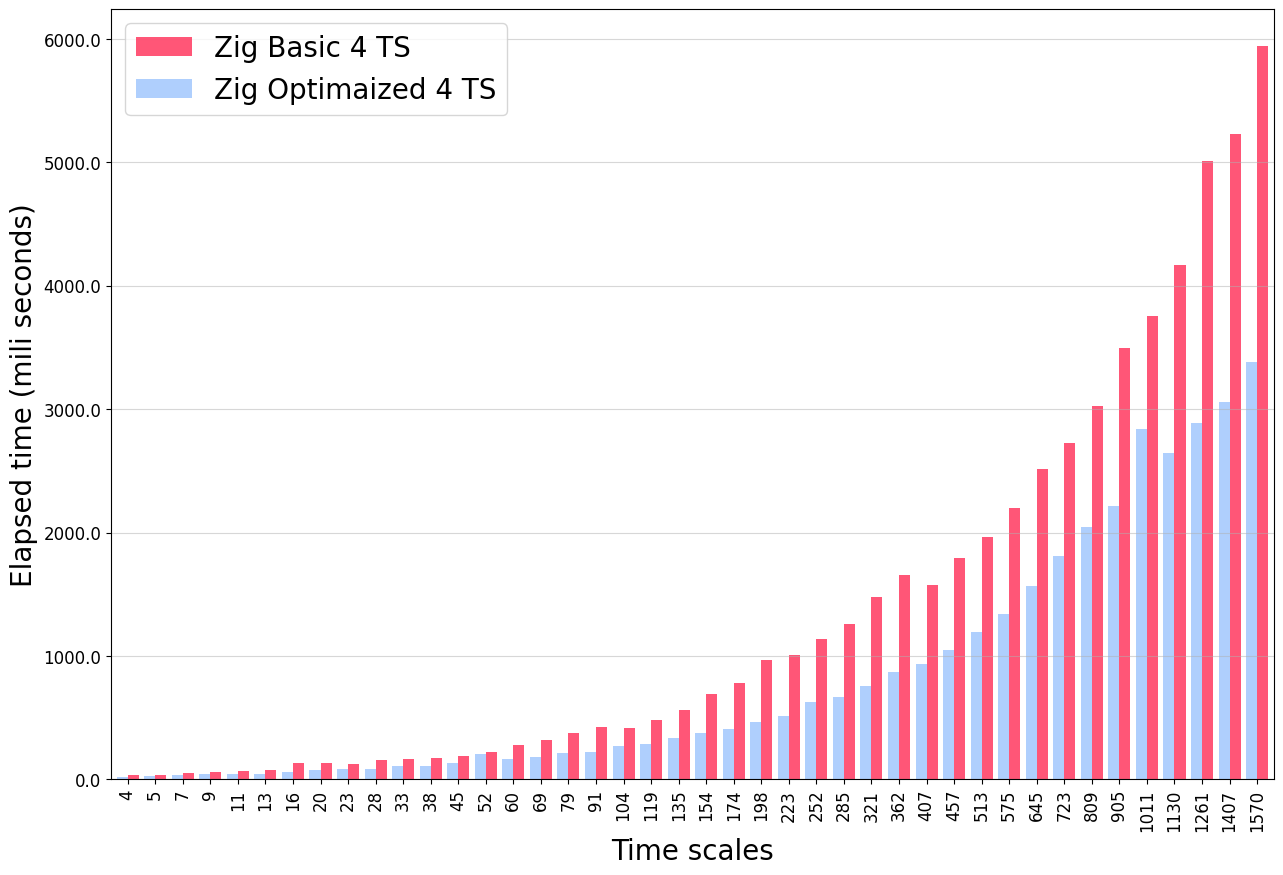

In [6]:
bar_width = .4
opacity = 0.8
bar_offset = 0
x_len = df_basic.shape[0]

x = np.arange(x_len) + bar_offset

fig, ax = plt.subplots(1,1, figsize=(15,10))

ax.bar(
        x + bar_width * .5 , 
        df_basic["Zig Basic 4 TS"].astype(int), 
        width=bar_width, 
        color='#FF2C55',

        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Basic 4 TS'
        )


ax.bar(
        x - bar_width * .5, 
        df_opt["Zig Optimized 4 TS"].astype(int),
        width=bar_width, 
        color='#9bc4fd',    
        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Optimaized 4 TS')
# ax.semilogx()
ax.legend(fontsize=20)
ax.set_xlim([-bar_width * 1.5 , x_len - bar_width ])

ax.tick_params(axis='x', labelrotation=90)
np.arange(0, 11, step=1)
ax.set_xticks(np.arange(42),df_basic["tws size"], fontsize=12)
ax.set_xlabel("Time scales", fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_ylabel("Elapsed time (mili seconds)", fontsize=20)
# ax.set_title("Elapsed time for Zig Basic and Zig Optimized")
ax.yaxis.grid(True, alpha=0.5)
plt.show()


In [7]:
df_basic_12 = get_time_data('../compared_perf/basic_12.txt',
                     #   "elapsed"
                       "Zig Basic 12 TS"
                       )
df_opt_12 = get_time_data('../compared_perf/opt_12.txt',
                     #   "elapsed"
                       "Zig Optimized 12 TS"
                       )

C:\Users\Nando\AppData\Local\Temp\ipykernel_8060\961362585.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


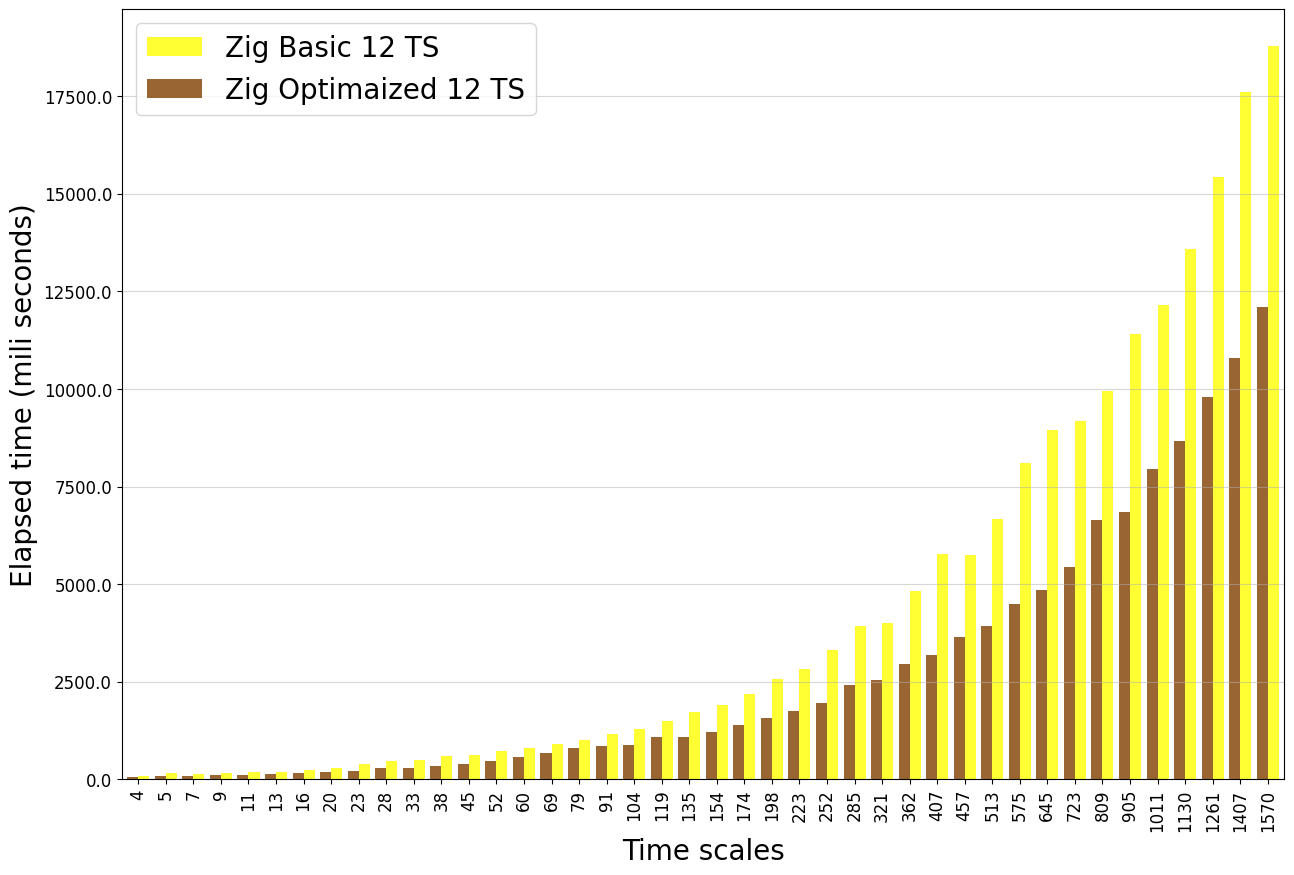

In [11]:
bar_width = .4
opacity = 0.8
bar_offset = 0
x_len = df_basic.shape[0]

x = np.arange(x_len) + bar_offset

fig, ax = plt.subplots(1,1, figsize=(15,10))

ax.bar(
        x + bar_width * .5 , 
        df_basic_12["Zig Basic 12 TS"].astype(int), 
        width=bar_width, 
        color='#ffff00', 

        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Basic 12 TS'
        )


ax.bar(
        x - bar_width * .5, 
        df_opt_12["Zig Optimized 12 TS"].astype(int),
        width=bar_width, 
        color='#804000',  
        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Optimaized 12 TS')
# ax.semilogx()
ax.legend(fontsize=20)
ax.set_xlim([-bar_width * 1.5 , x_len - bar_width ])

ax.tick_params(axis='x', labelrotation=90)
np.arange(0, 11, step=1)
ax.set_xticks(np.arange(42),df_basic["tws size"], fontsize=12)
ax.set_xlabel("Time scales", fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_ylabel("Elapsed time (mili seconds)", fontsize=20)
# ax.set_title("Elapsed time for Zig Basic and Zig Optimized")
ax.yaxis.grid(True, alpha=0.5)
plt.show()

In [9]:
def perf_inc(value, reference):
    return ((value - reference) / reference) * 100

In [10]:
perf_inc(df_04.iloc[:,1].astype(float), df_04.iloc[:,2].astype(float))

0      83.333333
1      46.153846
2      50.000000
3      40.476190
4      50.000000
5      60.869565
6     115.000000
7      78.082192
8      52.439024
9      86.746988
10     50.467290
11     60.550459
12     49.612403
13      7.804878
14     68.292683
15     76.111111
16     73.831776
17     89.285714
18     57.303371
19     66.896552
20     66.172107
21     85.294118
22     89.294404
23    107.081545
24     94.573643
25     80.952381
26     87.892377
27     94.078947
28     90.898618
29     67.769477
30     70.694577
31     64.794635
32     64.280388
33     60.830671
34     50.719027
35     47.535383
36     57.619477
37     32.136572
38     57.677761
39     73.562024
40     70.826527
41     75.568685
dtype: float64